## Clustering on Whole sale customer data

#### 1) FRESH: annual spending on fresh products (Continuous); 
#### 2) MILK: annual spending on milk products (Continuous); 
#### 3) GROCERY: annual spending on grocery products (Continuous); 
#### 4) FROZEN: annual spending on frozen products (Continuous) 
#### 5) DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous) 
#### 6) DELICATESSEN: annual spending on and delicatessen products (Continuous); 
#### 7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 
#### 8) REGION: customer Region Lisnon, Oporto or Other (Nominal) 


## Aim is to use various clustering techniques to segment customers.

In [81]:
#necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [219]:
#reading the dataframe
df=pd.read_csv("wholesale_customer.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [20]:
data=df.iloc[:,2:]
data.head()
raw=data

In [3]:
#shape
df.shape

(440, 8)

In [4]:
#Columns
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
#data types
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#Checking for null values
df.isnull().sum()
#phew no null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
#checking channel unique values
df.Channel.unique()

array([2, 1], dtype=int64)

In [9]:
#checking region unique values
df.Region.unique()

array([3, 1, 2], dtype=int64)

In [16]:
#summary statistics
display(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [64]:
df['Channel'].value_counts()

1    298
2    142
Name: Channel, dtype: int64

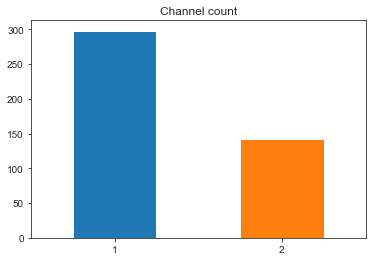

In [66]:
df.Channel.value_counts().plot(kind="bar",rot = 0, title='Channel count')

In [65]:
df['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

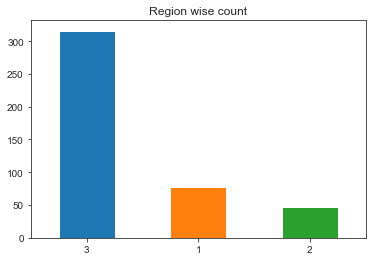

In [67]:
df.Region.value_counts().plot(kind="bar",rot = 0, title='Region wise count')

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


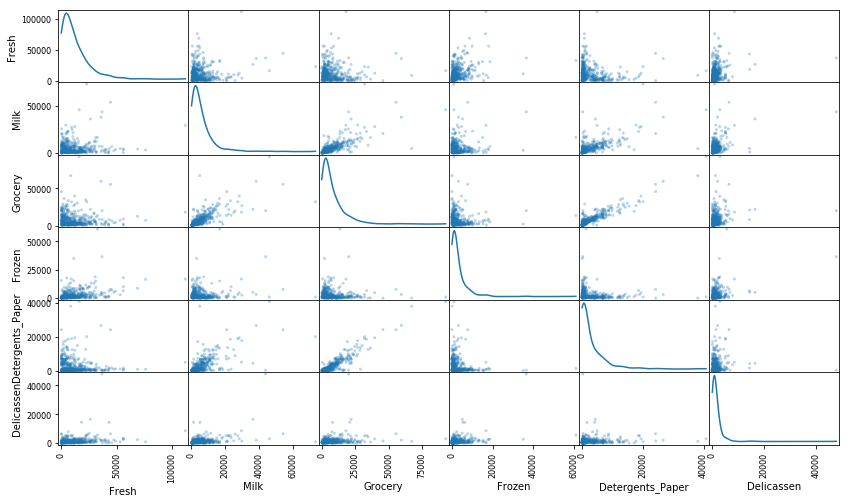

In [21]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

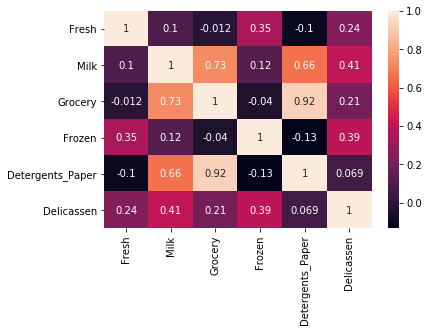

In [22]:
#heat map
sns.heatmap(data.corr(),annot = True)

## Outlier detection

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


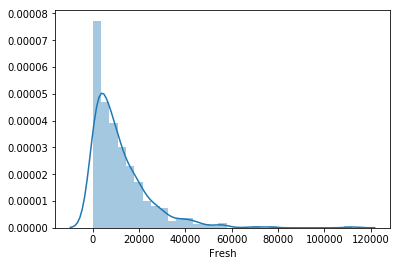

In [11]:
#checking for the distribution of features
import seaborn as sns
sns.distplot(df.Fresh,hist=True)

In [ ]:
## Above Fresh feature is a right skewed.

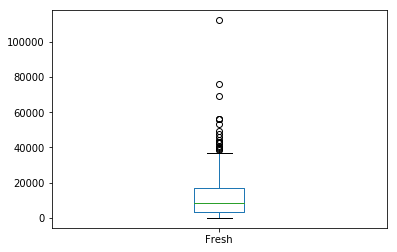

In [13]:
#lets check the outliers
df.Fresh.plot(kind='box') 
#it has too many outliers.

In [18]:
df['Fresh'].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


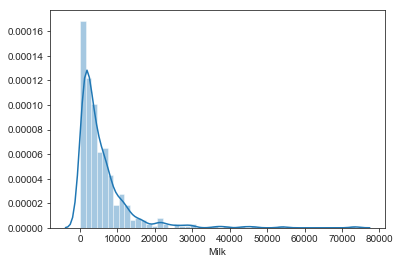

In [24]:
# lets check for Milk feature
sns.distplot(df.Milk,hist=True)
#it is also right skewed

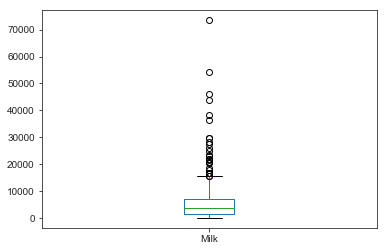

In [25]:
#lets check the outliers
df.Milk.plot(kind='box') 
#it has too many outliers.

In [26]:
df['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


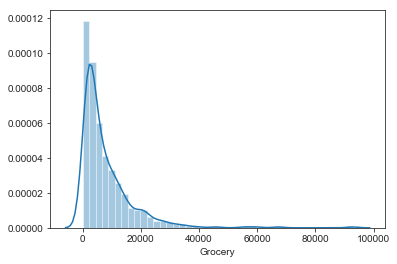

In [27]:
# lets check for Grocery feature
sns.distplot(df.Grocery,hist=True)
#it is also right skewed

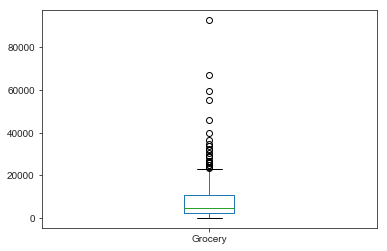

In [28]:
#lets check the outliers
df.Grocery.plot(kind='box') 
#it has too many outliers.

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


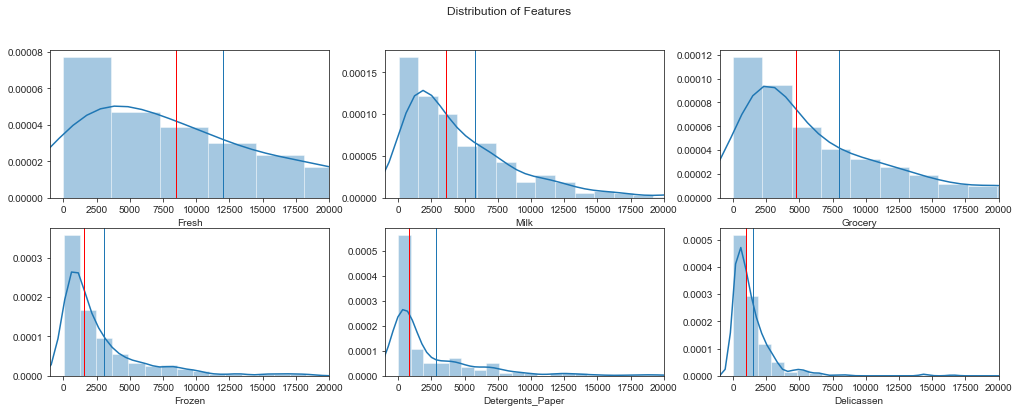

In [48]:
#using loop,lets construt a hist for all features.
#red line is median and blue is mean margin 
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(17, 6)
fig.suptitle('Distribution of Features')
for i, col in enumerate(raw.columns):
    feature = raw[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),);
    axes[i].axvline(feature.mean(),linewidth=1);
    axes[i].axvline(feature.median(),linewidth=1, color='r');

In [ ]:
#noticing the above ,all the features are right skewed and normal distributed.

#### Applying log transformations.

In [176]:
#hmmm, let me transform these features using log and see what will happen.
#converting df into log
log_raw1 = np.log(raw)
log_raw1.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


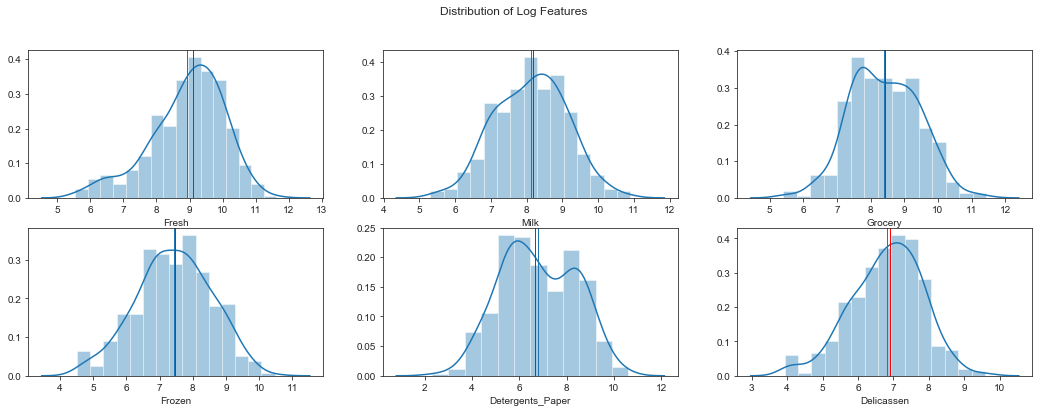

In [177]:
#histograms for transformed features.
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Log Features')

for i, col in enumerate(log_raw.columns):
    feature = log_raw[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')


In [178]:
## hmm,after log transformation ,the features are converted to little normal distibution.

In [179]:
log_raw = pd.concat([log_raw1, pd.Series(y_label)], axis=1)
log_raw.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2


### Removal of outliers

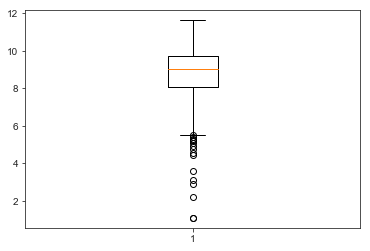

In [180]:
# outlier treatment for Fresh
plt.boxplot(log_raw.Fresh)
Q1 = log_raw.Fresh.quantile(0.25)
Q3 = log_raw.Fresh.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Fresh >= Q1 - 1.5*IQR) & (log_raw.Fresh <= Q3 + 1.5*IQR)]

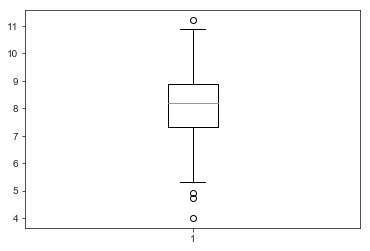

In [181]:
# outlier treatment for Milk
plt.boxplot(log_raw.Milk)
Q1 = log_raw.Milk.quantile(0.25)
Q3 = log_raw.Milk.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Milk >= Q1 - 1.5*IQR) & (log_raw.Milk <= Q3 + 1.5*IQR)]

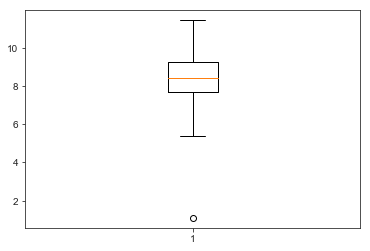

In [182]:
# outlier treatment for Milk
plt.boxplot(log_raw.Grocery)
Q1 = log_raw.Grocery.quantile(0.25)
Q3 = log_raw.Grocery.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Grocery >= Q1 - 1.5*IQR) & (log_raw.Grocery <= Q3 + 1.5*IQR)]

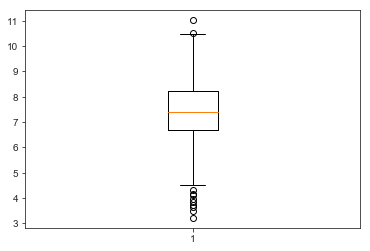

In [183]:
# outlier treatment for Frozen
plt.boxplot(log_raw.Frozen)
Q1 = log_raw.Frozen.quantile(0.25)
Q3 = log_raw.Frozen.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Frozen >= Q1 - 1.5*IQR) & (log_raw.Frozen <= Q3 + 1.5*IQR)]

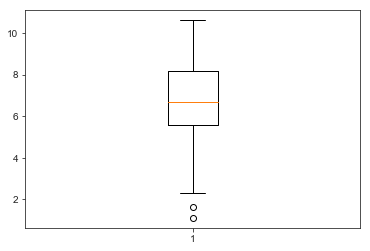

In [184]:
# outlier treatment for Detergents_Paper
plt.boxplot(log_raw.Detergents_Paper)
Q1 = log_raw.Detergents_Paper.quantile(0.25)
Q3 = log_raw.Detergents_Paper.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Detergents_Paper >= Q1 - 1.5*IQR) & (log_raw.Detergents_Paper <= Q3 + 1.5*IQR)]

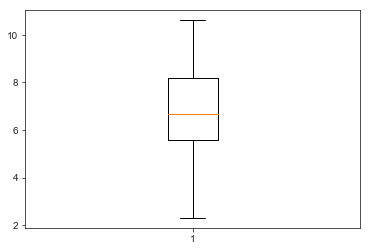

In [185]:
# outlier treatment for Delicassen
plt.boxplot(log_raw.Detergents_Paper)
Q1 = log_raw.Delicassen.quantile(0.25)
Q3 = log_raw.Delicassen.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Delicassen >= Q1 - 1.5*IQR) & (log_raw.Delicassen <= Q3 + 1.5*IQR)]

In [186]:
log_raw.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,2
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,2
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,2
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,2


In [187]:
##Maping channel to 0 and 1
log_raw['Channel'] = log_raw['Channel'].map({2: 1, 1: 0})
channel=log_raw.iloc[:,6]

In [189]:
y=channel

In [211]:
label=pd.DataFrame(channel)
label=label.dropna()
label.shape
label= label.reset_index()



In [214]:
label= label.drop(labels = "index", axis = 1)


#### Droping channel

In [223]:
log_raw = log_raw.drop(labels = "Channel", axis = 1)
log_raw.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [150]:
log_raw.shape

(394, 7)

In [175]:
len(channel)

122

## Feature scalling

In [118]:
#lets do  z_score
from scipy.stats import zscore
z_data=log_raw.apply(zscore)
z_data.head()
z_data.shape

(394, 6)

In [97]:
#or
#from sklearn.preprocessing import StandardScaler
#standard_scaler = StandardScaler()
#standard_scaler.fit_transform(log_raw)

array([[ 0.46060855,  1.05719494,  0.51375824, -1.83465643,  0.68984043,
         0.3906152 ],
       [-0.06354076,  1.07306307,  0.7466938 ,  0.04111918,  0.82094212,
         0.67350143],
       [-0.15767985,  0.96501248,  0.52972468,  0.31791764,  0.86219796,
         2.15730546],
       ...,
       [ 1.47303751, -0.85748162, -1.75423564,  0.87733926, -1.42488396,
         0.95155322],
       [ 0.58344216,  1.53103484,  1.88538573, -1.19942013,  1.76889461,
         0.72341745],
       [ 0.27430129, -0.53132145, -0.69346737, -0.42969011, -1.05254905,
         0.8527186 ]])

## PCA

#### Implementation: PCA
#### As the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved. 



In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6, svd_solver='full')

In [69]:
pca.fit(z_data) # only features
print(pca.explained_variance_ratio_) 

[0.44882376 0.25564184 0.11490963 0.10502988 0.04963525 0.02595964]


In [82]:
#!pip install visuals
#cummulative sum
pca.explained_variance_ratio_.cumsum()

array([0.50116384, 0.72833824, 0.8324643 , 0.92890723, 0.97794471,
       1.        ])

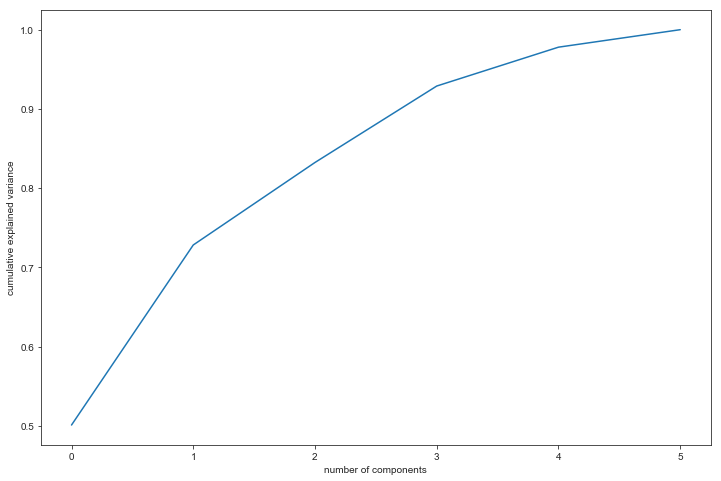

In [83]:
#Elbow plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
#So 83% of total variance is explained by 3 principle components.

In [84]:
#lets take 4 principle componets as it covers 92% of total variance.
from sklearn.decomposition import PCA
pca = PCA(n_components=4)# based on cummulative sum 
principalComponents = pca.fit_transform(z_data)
principalComponents

array([[ 1.50628   , -0.64742452, -0.79189398,  1.41041928],
       [ 1.62971339,  0.32405234,  0.17017107,  0.00777091],
       [ 1.8399851 ,  1.162517  ,  1.1549441 ,  0.63715229],
       ...,
       [-2.20983159,  1.95851508,  0.17880429,  0.80240265],
       [ 3.13106882, -0.07926236, -0.96143828,  0.75945257],
       [-0.99914527,  0.38918386,  0.46094023,  1.21830508]])

In [90]:
#convert above array to dataframe
principaldf = pd.DataFrame(data = principalComponents)
principaldf.columns=["pc1","pc2","pc3","pc4"]
principaldf.head()

,pc1,pc2,pc3,pc4
0,1.506280,-0.647425,-0.791894,1.410419
1,1.629713,0.324052,0.170171,0.007771
2,1.839985,1.162517,1.154944,0.637152
3,-0.790081,1.331595,0.358046,-0.205270
4,1.046390,1.911371,0.263553,0.507955


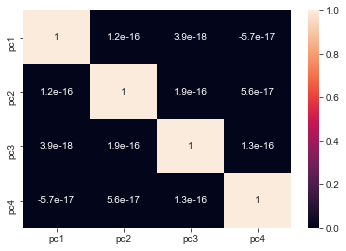

In [93]:
#heat map for reduced dimentions
sns.heatmap(principaldf.corr(),annot = True)

## K Means clustering

In [99]:
#imports for clustering
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

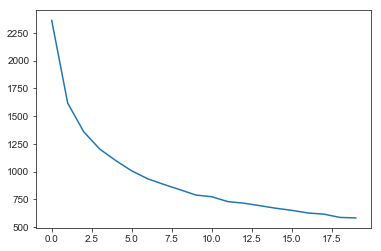

In [103]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(z_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)
#take k=2

In [123]:
model_clus = KMeans(n_clusters = 2, max_iter=50)
model_clus.fit(z_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [124]:
len(model_clus.labels_)

394

In [126]:
log_raw.shape

(394, 6)

In [165]:
# analysis of clusters formed
log_raw.index = pd.RangeIndex(len(log_raw.index))
cluster1 = pd.concat([log_raw, pd.Series(model_clus5.labels_)], axis=1)
cluster1.columns = ['fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen', 'ClusterID']

In [218]:
#whole dataframe with customer segmentation
cluster1

,fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterID
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,1
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008,1
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786,1
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104,1
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073,1
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740,1


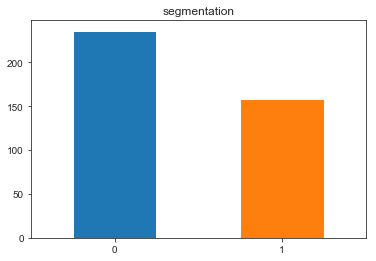

In [220]:
cluster1.ClusterID.value_counts().plot(kind="bar",rot = 0, title='segmentation')

In [215]:
total = pd.concat([cluster1, label], axis=1)

In [216]:
#added Channel to above dataframe
total

,fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterID,Channel
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,1,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,1,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,1,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,1,1
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008,1,1
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786,1,1
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104,1,1
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073,1,0
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740,1,1


### i can notice that the cluster id and the channel are same.
#### My K-Means cluster has sucessfully segemented customer Channels ie Horeca  and Retail channel 

In [226]:
#lets use k=3
model_clus = KMeans(n_clusters = 3, max_iter=50)
model_clus.fit(z_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [229]:
log_raw.index = pd.RangeIndex(len(log_raw.index))
cluster2 = pd.concat([log_raw, pd.Series(model_clus.labels_)], axis=1)
cluster2.columns = ['fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen', 'ClusterID']

In [230]:
cluster2

,fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterID
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,0
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008,1
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786,1
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104,1
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073,1
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740,1
